In [1]:
# import warnings
# warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

exo = pd.read_csv('exo_clean.csv')
exo.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
exo.columns


Index(['koi_disposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [4]:
target = exo['koi_disposition']
data = exo[['koi_score','koi_fpflag_co','koi_model_snr','koi_fpflag_ss','koi_prad','koi_prad_err2','koi_fpflag_nt','koi_prad_err1','koi_duration_err2','koi_duration_err1','koi_steff_err1','koi_fpflag_ec','koi_steff_err2','koi_duration','koi_time0bk_err2','koi_period','koi_depth','koi_impact','koi_teq','koi_time0bk_err1','koi_period_err2','koi_insol_err1','koi_time0bk','koi_depth_err2','koi_depth_err1']]
feature_names = data.columns
data.head()

,koi_score,koi_fpflag_co,koi_model_snr,koi_fpflag_ss,koi_prad,koi_prad_err2,koi_fpflag_nt,koi_prad_err1,koi_duration_err2,koi_duration_err1,...,koi_period,koi_depth,koi_impact,koi_teq,koi_time0bk_err1,koi_period_err2,koi_insol_err1,koi_time0bk,koi_depth_err2,koi_depth_err1
0,1.000,0,35.8,0,2.26,-0.15,0,0.26,-0.08190,0.08190,...,9.488036,615.8,0.146,793.0,0.002160,-2.775000e-05,29.45,170.538750,-19.5,19.5
1,0.969,0,25.8,0,2.83,-0.19,0,0.32,-0.11600,0.11600,...,54.418383,874.8,0.586,443.0,0.003520,-2.479000e-04,2.87,162.513840,-35.5,35.5
2,0.000,0,76.3,1,14.60,-1.31,0,3.92,-0.03410,0.03410,...,19.899140,10829.0,0.969,638.0,0.000581,-1.494000e-05,31.04,175.850252,-171.0,171.0
3,0.000,0,505.6,1,33.46,-2.83,0,8.50,-0.00537,0.00537,...,1.736952,8079.2,1.276,1395.0,0.000115,-2.630000e-07,668.95,170.307565,-12.8,12.8
4,1.000,0,40.9,0,2.75,-0.35,0,0.88,-0.04200,0.04200,...,2.525592,603.3,0.701,1406.0,0.001130,-3.761000e-06,874.33,171.595550,-16.9,16.9


In [5]:
# create train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
X_train.head()

,koi_score,koi_fpflag_co,koi_model_snr,koi_fpflag_ss,koi_prad,koi_prad_err2,koi_fpflag_nt,koi_prad_err1,koi_duration_err2,koi_duration_err1,...,koi_period,koi_depth,koi_impact,koi_teq,koi_time0bk_err1,koi_period_err2,koi_insol_err1,koi_time0bk,koi_depth_err2,koi_depth_err1
6160,0.994,0,9.9,0,3.33,-2.47,0,0.61,-0.2250,0.2250,...,8.609654,63.2,0.213,1550.0,0.00653,-0.000070,838.61,134.38829,-7.9,7.9
2164,0.717,0,18.1,0,2.40,-0.16,0,0.09,-0.2630,0.2630,...,88.071277,885.4,0.347,330.0,0.00740,-0.000850,0.43,214.51304,-55.9,55.9
4626,0.999,0,20.2,0,1.51,-0.13,0,0.13,-0.0844,0.0844,...,5.709408,586.7,0.751,644.0,0.00256,-0.000018,12.62,137.12208,-34.0,34.0
6074,0.000,0,27.0,0,4.66,-0.32,1,0.31,-0.8950,0.8950,...,659.290700,338.1,0.982,322.0,0.01710,-0.011970,0.50,254.33000,-17.3,17.3
4663,0.905,0,9.7,0,1.25,-0.16,0,0.20,-0.8010,0.8010,...,6.685438,89.2,0.853,1040.0,0.01420,-0.000183,115.49,132.31840,-13.1,13.1


In [7]:
y_train.head()

6160         CANDIDATE
2164         CANDIDATE
4626         CONFIRMED
6074    FALSE POSITIVE
4663         CANDIDATE
Name: koi_disposition, dtype: object

### Pre processing

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [9]:
print(X_minmax)
print(X_train_minmax)
print(X_test_minmax)

MinMaxScaler()
[[9.94000000e-01 0.00000000e+00 8.06442704e-04 ... 1.02239723e-02
  9.99425036e-01 5.74963610e-04]
 [7.17000000e-01 0.00000000e+00 1.71230985e-03 ... 6.94897527e-02
  9.95931587e-01 4.06841339e-03]
 [9.99000000e-01 0.00000000e+00 1.94430022e-03 ... 1.22460716e-02
  9.97525473e-01 2.47452693e-03]
 ...
 [1.00000000e+00 0.00000000e+00 1.47148176e-02 ... 1.41631527e-02
  9.99417758e-01 5.82241630e-04]
 [9.12000000e-01 0.00000000e+00 6.29688139e-04 ... 8.80531707e-03
  9.99257642e-01 7.42358079e-04]
 [5.00000000e-02 0.00000000e+00 6.40735299e-04 ... 2.01533628e-01
  9.91411936e-01 8.58806405e-03]]
[[9.99000000e-01 0.00000000e+00 1.59079109e-03 ... 1.43773903e-02
  9.95698690e-01 4.30131004e-03]
 [9.97000000e-01 0.00000000e+00 1.93325306e-03 ... 1.71454604e-02
  9.97983988e-01 2.01601164e-03]
 [0.00000000e+00 1.00000000e+00 5.96546658e-04 ... 1.48472058e-02
  9.95960699e-01 4.03930131e-03]
 ...
 [1.46000000e-01 0.00000000e+00 5.19216535e-04 ... 2.54444412e-02
  9.96048035e-01 

### Train the model (Random Forest)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_minmax, y_train)

RandomForestClassifier()

In [11]:
print(f"Training Data Score: {rf.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_minmax, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8923628908252178


In [12]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2539347505444911, 'koi_score'),
 (0.08290827455743843, 'koi_fpflag_co'),
 (0.06219536044444784, 'koi_fpflag_ss'),
 (0.059233779140819474, 'koi_model_snr'),
 (0.05442134323528185, 'koi_prad'),
 (0.037181828235383595, 'koi_prad_err2'),
 (0.0365894042476291, 'koi_fpflag_nt'),
 (0.03521114894913077, 'koi_duration_err1'),
 (0.034972213167041105, 'koi_prad_err1'),
 (0.02870523581738133, 'koi_duration'),
 (0.028654234032284447, 'koi_duration_err2'),
 (0.02517903956726207, 'koi_steff_err1'),
 (0.024775156933507292, 'koi_impact'),
 (0.024442549919288722, 'koi_steff_err2'),
 (0.023617103242056712, 'koi_depth'),
 (0.021884170755160182, 'koi_period'),
 (0.021362333754299256, 'koi_time0bk_err2'),
 (0.020692995364638412, 'koi_time0bk_err1'),
 (0.020320665870024995, 'koi_insol_err1'),
 (0.01902255906581719, 'koi_fpflag_ec'),
 (0.01767039105166572, 'koi_period_err2'),
 (0.0170144325808025, 'koi_teq'),
 (0.01699557232639064, 'koi_time0bk'),
 (0.016602953341480535, 'koi_depth_err2'),
 (0.01641250385

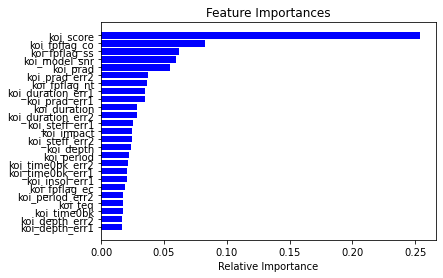

In [13]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter tuning

In [14]:
# gridsearchcv
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250,300,350],
              'max_depth': [125,150,175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [15]:
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=125, n_estimators=250;, score=0.893 total time=   4.1s
[CV 2/5] END ...max_depth=125, n_estimators=250;, score=0.898 total time=   4.2s
[CV 3/5] END ...max_depth=125, n_estimators=250;, score=0.879 total time=   3.9s
[CV 4/5] END ...max_depth=125, n_estimators=250;, score=0.893 total time=   3.6s
[CV 5/5] END ...max_depth=125, n_estimators=250;, score=0.887 total time=   3.6s
[CV 1/5] END ...max_depth=125, n_estimators=300;, score=0.892 total time=   4.3s
[CV 2/5] END ...max_depth=125, n_estimators=300;, score=0.893 total time=   4.3s
[CV 3/5] END ...max_depth=125, n_estimators=300;, score=0.876 total time=   4.2s
[CV 4/5] END ...max_depth=125, n_estimators=300;, score=0.885 total time=   4.4s
[CV 5/5] END ...max_depth=125, n_estimators=300;, score=0.886 total time=   4.4s
[CV 1/5] END ...max_depth=125, n_estimators=350;, score=0.887 total time=   5.1s
[CV 2/5] END ...max_depth=125, n_estimators=350;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [16]:
# print best params and score
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 125, 'n_estimators': 250}
0.8901210887034969


In [17]:
# print training score
grid.score(X_train_minmax, y_train)

1.0

In [18]:
# print testing score
grid.score(X_test_minmax,y_test)

0.8980010251153254

In [19]:
# make predictions
predictions = grid.predict(X_test_minmax)
print(predictions)

['CONFIRMED' 'CONFIRMED' 'FALSE POSITIVE' ... 'FALSE POSITIVE' 'CANDIDATE'
 'FALSE POSITIVE']


In [20]:
# print classification
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.73      0.78       446
     CONFIRMED       0.81      0.87      0.84       572
FALSE POSITIVE       0.98      1.00      0.99       933

      accuracy                           0.90      1951
     macro avg       0.87      0.86      0.87      1951
  weighted avg       0.90      0.90      0.90      1951



In [21]:
# save the model
import joblib
filename = 'rf.sav'
joblib.dump(rf, filename)

['rf.sav']